In [2]:
import pandas as pd 

dtype_dict = {'LAT_MT': str, 'LONG_MT': str}
mt_stop = pd.read_csv('data/agg_mt_gps_with_stop_time_for_surveillance_h30.csv', dtype=dtype_dict, low_memory=False)
display(mt_stop.dtypes)

print("\nJumlah data sebelum drop_duplicates:")
print("Jumlah data (rows):", mt_stop.shape[0])
print("Jumlah kolom:", mt_stop.shape[1])

# Step 1: Drop Duplicate Data
df_mt_stop = mt_stop.drop_duplicates().copy()
print("\nJumlah data setelah drop_duplicates:")
print("Jumlah data (rows):", df_mt_stop.shape[0])
print("Jumlah kolom:", df_mt_stop.shape[1])

# Step 2: Menghapus baris dengan LAMA_BERHENTI_JAM == 0
df_mt_stop['LAMA_BERHENTI_JAM'] = pd.to_numeric(df_mt_stop['LAMA_BERHENTI_JAM'], errors='coerce')
df_mt_stop = df_mt_stop[df_mt_stop['LAMA_BERHENTI_JAM'] != 0]
df_mt_stop = df_mt_stop.dropna(subset=['LAMA_BERHENTI_JAM'])
print("\nJumlah data setelah menghapus LAMA_BERHENTI_JAM == 0:")
print("Jumlah data (rows):", df_mt_stop.shape[0])
print("Jumlah kolom:", df_mt_stop.shape[1])

# Step 3: Mengidentifikasi dan Mengisi Nilai NaN
# a. Mengidentifikasi kolom string (object)
string_columns = df_mt_stop.select_dtypes(include=['object']).columns.tolist()
print("\nKolom bertipe string (object):")
print(string_columns)
df_mt_stop[string_columns] = df_mt_stop[string_columns].fillna('')
print("\nJumlah nilai NaN pada kolom string setelah pengisian:")
print(df_mt_stop[string_columns].isnull().sum())

# b. Mengidentifikasi kolom numerik
numerical_columns = df_mt_stop.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nKolom bertipe numerik:")
print(numerical_columns)
df_mt_stop[numerical_columns] = df_mt_stop[numerical_columns].fillna(0)
print("\nJumlah nilai NaN pada kolom numerik setelah pengisian:")
print(df_mt_stop[numerical_columns].isnull().sum())

# Step 4: Memperbaiki nilai LAT_MT dan LONG_MT yang tidak benar
# Pastikan 'LAT_MT' dan 'LONG_MT' bertipe string sebelum menggunakan .str accessor
df_mt_stop['LAT_MT'] = df_mt_stop['LAT_MT'].astype(str)
df_mt_stop['LONG_MT'] = df_mt_stop['LONG_MT'].astype(str)
mask_lat_salah = df_mt_stop['LAT_MT'].str.startswith('.') | df_mt_stop['LAT_MT'].str.startswith('-.')
mask_lon_salah = df_mt_stop['LONG_MT'].str.startswith('.') | df_mt_stop['LONG_MT'].str.startswith('-.')
latitude_salah = df_mt_stop[mask_lat_salah]
longitude_salah = df_mt_stop[mask_lon_salah]
print("\nLatitude yang tidak benar:")
display(latitude_salah)
print("\nLongitude yang tidak benar:")
display(longitude_salah)
df_mt_stop.loc[mask_lat_salah, 'LAT_MT'] = df_mt_stop.loc[mask_lat_salah, 'LAT_MT'].apply(
    lambda x: '0' + x if x.startswith('.') else '-0' + x[1:]
)
df_mt_stop.loc[mask_lon_salah, 'LONG_MT'] = df_mt_stop.loc[mask_lon_salah, 'LONG_MT'].apply(
    lambda x: '0' + x if x.startswith('.') else '-0' + x[1:]
)

df_mt_stop['LAT_MT'] = pd.to_numeric(df_mt_stop['LAT_MT'], errors='coerce')
df_mt_stop['LONG_MT'] = pd.to_numeric(df_mt_stop['LONG_MT'], errors='coerce')
df_mt_stop.to_excel('data/df_mt_stop_cleaned.xlsx', index=False)
print("\nData berhasil diekspor ke 'data/df_mt_stop_cleaned.xlsx'")
print("\nDataFrame setelah perbaikan koordinat:")
display(df_mt_stop)

TANGGAL                   object
PLATENO                   object
NOMORLO                    int64
NIPSUPIR                  object
SUPIR                     object
PRODUK                    object
KLDO                     float64
LAT_MT                    object
LONG_MT                   object
SPEED                      int64
TRANSPORTIR               object
VENDOR_GPS                object
JENIS_TRUCK               object
JENIS_KERJASAMA           object
JENIS_SEWA_PENEMPATAN     object
KAPASITAS_TANKI          float64
STATUS_VEHICLE            object
TBBM_ASAL                 object
MOR_ASSET                 object
LAT_TBBM                 float64
LONG_TBBM                float64
SHIPMENTDATE              object
GATEOUTTIME               object
SHIPMENTEND               object
SPBU_TUJUAN               object
MOR_SPBU                  object
LAT_SPBU                 float64
LONG_SPBU                float64
EXTRAINFO                 object
START_STOP_TIME           object
END_STOP_T


Jumlah data sebelum drop_duplicates:
Jumlah data (rows): 26174
Jumlah kolom: 32

Jumlah data setelah drop_duplicates:
Jumlah data (rows): 26174
Jumlah kolom: 32

Jumlah data setelah menghapus LAMA_BERHENTI_JAM == 0:
Jumlah data (rows): 26174
Jumlah kolom: 32

Kolom bertipe string (object):
['TANGGAL', 'PLATENO', 'NIPSUPIR', 'SUPIR', 'PRODUK', 'LAT_MT', 'LONG_MT', 'TRANSPORTIR', 'VENDOR_GPS', 'JENIS_TRUCK', 'JENIS_KERJASAMA', 'JENIS_SEWA_PENEMPATAN', 'STATUS_VEHICLE', 'TBBM_ASAL', 'MOR_ASSET', 'SHIPMENTDATE', 'GATEOUTTIME', 'SHIPMENTEND', 'SPBU_TUJUAN', 'MOR_SPBU', 'EXTRAINFO', 'START_STOP_TIME', 'END_STOP_TIME']

Jumlah nilai NaN pada kolom string setelah pengisian:
TANGGAL                  0
PLATENO                  0
NIPSUPIR                 0
SUPIR                    0
PRODUK                   0
LAT_MT                   0
LONG_MT                  0
TRANSPORTIR              0
VENDOR_GPS               0
JENIS_TRUCK              0
JENIS_KERJASAMA          0
JENIS_SEWA_PENEMPATAN    0


,TANGGAL,PLATENO,NOMORLO,NIPSUPIR,SUPIR,PRODUK,KLDO,LAT_MT,LONG_MT,SPEED,...,GATEOUTTIME,SHIPMENTEND,SPBU_TUJUAN,MOR_SPBU,LAT_SPBU,LONG_SPBU,EXTRAINFO,START_STOP_TIME,END_STOP_TIME,LAMA_BERHENTI_JAM
0,2024-10-26 00:00:00,BM9305AU,8115146584,APMS_4692,FEBI YULMANTO,PERTALITE,5.0,.549885,101.461545,0,...,2024-10-26 10:29:29,2024-10-26 11:04:40,16287054,MOR I,0.000000,0.000000,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=0; ...,2024-10-26 09:30:16,2024-10-26 10:25:03,0.913056
1,2024-10-25 00:00:00,BM9425AU,8115087994,73107985,JIMMI LUMBANTORUAN,BIOSOLAR B35,8.0,.6189049999999999,101.424348,0,...,2024-10-25 11:11:34,2024-10-25 15:18:27,13284623,MOR I,101.278951,0.416499,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=18;...,2024-10-25 17:50:06,2024-10-25 18:55:04,1.082778
2,2024-10-30 00:00:00,B9262TFV,8115258579,73100541,ZULFA INDRA,PERTALITE,8.0,.550003,101.461511,0,...,2024-10-30 16:49:55,2024-10-30 18:38:39,142826115,MOR I,0.000000,0.000000,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=5; ...,2024-10-30 08:45:08,2024-10-30 09:45:04,0.998889
3,2024-10-07 00:00:00,BM9644AO,8114357237,73100557,BENI SAPUTRA,PERTALITE,8.0,.35379299999999997,101.08329599999999,0,...,2024-10-07 16:20:21,2024-10-08 02:40:42,14283690,MOR I,0.199514,102.038479,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=59;...,2024-10-07 11:55:06,2024-10-07 12:55:04,0.999444
4,2024-10-26 00:00:00,B9252TFV,8115029110,73100406,WAHYUDI,PERTALITE,8.0,.550773,101.462245,0,...,2024-10-26 16:08:54,2024-10-26 17:58:38,11282604,MOR I,0.514804,101.433143,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=4; ...,2024-10-26 19:30:04,2024-10-26 20:35:03,1.083056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,2024-10-30 00:00:00,BM8456QI,8115289401,73100406,WAHYUDI,BIOSOLAR B35,8.0,.520213,101.482298,28,...,2024-10-30 06:54:54,2024-10-30 13:04:45,14284633,MOR I,0.399797,101.858565,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=39;...,2024-10-30 07:35:09,2024-10-30 08:05:10,0.500278
26170,2024-10-31 00:00:00,BA8299IU,8115333952,73100478,MUSLIMZ,PERTALITE,8.0,.5498259999999999,101.46147099999999,0,...,2024-10-31 09:58:37,2024-10-31 11:48:12,14282661,MOR I,0.477736,101.453018,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=6; ...,2024-10-31 02:45:05,2024-10-31 03:45:05,1.000000
26171,2024-10-31 00:00:00,BM9194QB,8115278050,73100371,FAIZAL MAIKA PUTRA,BIOSOLAR B35,8.0,.422791,101.857106,0,...,2024-10-31 15:06:59,2024-10-31 17:31:48,13282612,MOR I,0.476397,101.395109,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=8; ...,2024-10-31 21:40:06,2024-10-31 22:40:04,0.999444
26172,2024-10-05 00:00:00,BM8054JU,8114294640,73100378,HERMAN,"PERTAMAX,BULK",4.0,.45654,101.354708,0,...,2024-10-05 08:19:06.528371,2024-10-05 10:23:29,13282613,MOR I,0.497268,101.483422,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=6; ...,2024-10-05 17:50:06,2024-10-05 18:55:04,1.082778



Longitude yang tidak benar:


,TANGGAL,PLATENO,NOMORLO,NIPSUPIR,SUPIR,PRODUK,KLDO,LAT_MT,LONG_MT,SPEED,...,GATEOUTTIME,SHIPMENTEND,SPBU_TUJUAN,MOR_SPBU,LAT_SPBU,LONG_SPBU,EXTRAINFO,START_STOP_TIME,END_STOP_TIME,LAMA_BERHENTI_JAM



Data berhasil diekspor ke 'data/df_mt_stop_cleaned.xlsx'

DataFrame setelah perbaikan koordinat:


,TANGGAL,PLATENO,NOMORLO,NIPSUPIR,SUPIR,PRODUK,KLDO,LAT_MT,LONG_MT,SPEED,...,GATEOUTTIME,SHIPMENTEND,SPBU_TUJUAN,MOR_SPBU,LAT_SPBU,LONG_SPBU,EXTRAINFO,START_STOP_TIME,END_STOP_TIME,LAMA_BERHENTI_JAM
0,2024-10-26 00:00:00,BM9305AU,8115146584,APMS_4692,FEBI YULMANTO,PERTALITE,5.0,0.549885,101.461545,0,...,2024-10-26 10:29:29,2024-10-26 11:04:40,16287054,MOR I,0.000000,0.000000,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=0; ...,2024-10-26 09:30:16,2024-10-26 10:25:03,0.913056
1,2024-10-25 00:00:00,BM9425AU,8115087994,73107985,JIMMI LUMBANTORUAN,BIOSOLAR B35,8.0,0.618905,101.424348,0,...,2024-10-25 11:11:34,2024-10-25 15:18:27,13284623,MOR I,101.278951,0.416499,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=18;...,2024-10-25 17:50:06,2024-10-25 18:55:04,1.082778
2,2024-10-30 00:00:00,B9262TFV,8115258579,73100541,ZULFA INDRA,PERTALITE,8.0,0.550003,101.461511,0,...,2024-10-30 16:49:55,2024-10-30 18:38:39,142826115,MOR I,0.000000,0.000000,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=5; ...,2024-10-30 08:45:08,2024-10-30 09:45:04,0.998889
3,2024-10-07 00:00:00,BM9644AO,8114357237,73100557,BENI SAPUTRA,PERTALITE,8.0,0.353793,101.083296,0,...,2024-10-07 16:20:21,2024-10-08 02:40:42,14283690,MOR I,0.199514,102.038479,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=59;...,2024-10-07 11:55:06,2024-10-07 12:55:04,0.999444
4,2024-10-26 00:00:00,B9252TFV,8115029110,73100406,WAHYUDI,PERTALITE,8.0,0.550773,101.462245,0,...,2024-10-26 16:08:54,2024-10-26 17:58:38,11282604,MOR I,0.514804,101.433143,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=4; ...,2024-10-26 19:30:04,2024-10-26 20:35:03,1.083056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,2024-10-30 00:00:00,BM8456QI,8115289401,73100406,WAHYUDI,BIOSOLAR B35,8.0,0.520213,101.482298,28,...,2024-10-30 06:54:54,2024-10-30 13:04:45,14284633,MOR I,0.399797,101.858565,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=39;...,2024-10-30 07:35:09,2024-10-30 08:05:10,0.500278
26170,2024-10-31 00:00:00,BA8299IU,8115333952,73100478,MUSLIMZ,PERTALITE,8.0,0.549826,101.461471,0,...,2024-10-31 09:58:37,2024-10-31 11:48:12,14282661,MOR I,0.477736,101.453018,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=6; ...,2024-10-31 02:45:05,2024-10-31 03:45:05,1.000000
26171,2024-10-31 00:00:00,BM9194QB,8115278050,73100371,FAIZAL MAIKA PUTRA,BIOSOLAR B35,8.0,0.422791,101.857106,0,...,2024-10-31 15:06:59,2024-10-31 17:31:48,13282612,MOR I,0.476397,101.395109,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=8; ...,2024-10-31 21:40:06,2024-10-31 22:40:04,0.999444
26172,2024-10-05 00:00:00,BM8054JU,8114294640,73100378,HERMAN,"PERTAMAX,BULK",4.0,0.456540,101.354708,0,...,2024-10-05 08:19:06.528371,2024-10-05 10:23:29,13282613,MOR I,0.497268,101.483422,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=6; ...,2024-10-05 17:50:06,2024-10-05 18:55:04,1.082778



STATISTIK DESKRIPSI


,NOMORLO,KLDO,LAT_MT,LONG_MT,SPEED,KAPASITAS_TANKI,LAT_TBBM,LONG_TBBM,LAT_SPBU,LONG_SPBU,LAMA_BERHENTI_JAM
count,2.617400e+04,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,2.617400e+04,2.617400e+04,26174.000000,26174.000000,26174.000000
mean,8.114695e+09,7.544651,0.436756,101.468431,4.357912,15.574425,5.498670e-01,1.014624e+02,2.589797,81.114329,0.921795
std,3.674683e+05,1.441450,0.322672,0.268851,11.962979,3.635792,1.789714e-13,1.564645e-11,15.251737,40.655447,0.237101
min,8.113427e+09,0.400000,-0.955688,100.168935,0.000000,5.000000,5.498670e-01,1.014624e+02,-102.409155,0.000000,0.500278
25%,8.114393e+09,8.000000,0.427181,101.424388,0.000000,16.000000,5.498670e-01,1.014624e+02,0.000000,101.083388,0.915833
50%,8.114700e+09,8.000000,0.549455,101.461483,0.000000,16.000000,5.498670e-01,1.014624e+02,0.417978,101.417604,0.999722
75%,8.114992e+09,8.000000,0.549951,101.462223,0.000000,16.000000,5.498670e-01,1.014624e+02,0.483798,101.507126,1.082222
max,8.115341e+09,16.000000,2.119493,103.139036,63.000000,24.000000,5.498670e-01,1.014624e+02,101.493836,102.931575,1.500000



-MISSING VALUES


TANGGAL                  0
PLATENO                  0
NOMORLO                  0
NIPSUPIR                 0
SUPIR                    0
PRODUK                   0
KLDO                     0
LAT_MT                   0
LONG_MT                  0
SPEED                    0
TRANSPORTIR              0
VENDOR_GPS               0
JENIS_TRUCK              0
JENIS_KERJASAMA          0
JENIS_SEWA_PENEMPATAN    0
KAPASITAS_TANKI          0
STATUS_VEHICLE           0
TBBM_ASAL                0
MOR_ASSET                0
LAT_TBBM                 0
LONG_TBBM                0
SHIPMENTDATE             0
GATEOUTTIME              0
SHIPMENTEND              0
SPBU_TUJUAN              0
MOR_SPBU                 0
LAT_SPBU                 0
LONG_SPBU                0
EXTRAINFO                0
START_STOP_TIME          0
END_STOP_TIME            0
LAMA_BERHENTI_JAM        0
dtype: int64


STATISTIK DEKSRIPSI BERDASARKAN PRODUK


NOMORLO                                             \
                        count          mean            std           min   
PRODUK                                                                     
BIOSOLAR B35          10833.0  8.114699e+09  366581.218563  8.113860e+09   
DEXLITE                 414.0  8.114701e+09  387451.319473  8.113973e+09   
PERTALITE             11925.0  8.114693e+09  365950.689636  8.113427e+09   
PERTAMAX TURBO, BULK    906.0  8.114629e+09  373299.077087  8.114041e+09   
PERTAMAX,BULK          2096.0  8.114716e+09  371107.439748  8.114054e+09   

                                                                              \
                               25%           50%           75%           max   
PRODUK                                                                         
BIOSOLAR B35          8.114393e+09  8.114702e+09  8.115009e+09  8.115341e+09   
DEXLITE               8.114357e+09  8.114685e+09  8.115052e+09  8.115335e+09   
PERTALITE             8.114397e+09  8.114693e+09  8.114982e+09  8.115338e+09   
PERTAMAX TURBO, BULK  8.114276e+09  8.114590e+09  8.114952e+09  8.115335e+09   
PERTAMAX,BULK         8.114387e+09  8.114770e+09  8.115048e+09  8.115335e+09   

                         KLDO            ...   LONG_SPBU              \
                        count      mean  ...         75%         max   
PRODUK                                   ...                           
BIOSOLAR B35          10833.0  7.972399  ...  101.647368  102.734528   
DEXLITE                 414.0  5.331691  ...  101.647368  102.931575   
PERTALITE             11925.0  7.825937  ...  101.483422  102.918892   
PERTAMAX TURBO, BULK    906.0  6.803532  ...  101.434849  102.931575   
PERTAMAX,BULK          2096.0  4.490969  ...  101.417683  101.897362   

                     LAMA_BERHENTI_JAM                                \
                                 count      mean       std       min   
PRODUK                                                                 
BIOSOLAR B35                   10833.0  0.920748  0.234426  0.500278   
DEXLITE                          414.0  0.899364  0.242550  0.500278   
PERTALITE                      11925.0  0.920445  0.238576  0.500278   
PERTAMAX TURBO, BULK             906.0  0.931459  0.237810  0.500278   
PERTAMAX,BULK                   2096.0  0.935150  0.240531  0.500278   

                                                         
                           25%       50%       75%  max  
PRODUK                                                   
BIOSOLAR B35          0.916111  0.999722  1.082222  1.5  
DEXLITE               0.666389  0.999722  1.081944  1.5  
PERTALITE             0.915556  0.999722  1.082222  1.5  
PERTAMAX TURBO, BULK  0.916111  0.999722  1.082431  1.5  
PERTAMAX,BULK         0.916111  0.999722  1.082500  1.5  

[5 rows x 88 columns]

C:\Users\iedcc_10\AppData\Local\Temp\ipykernel_4448\1385572082.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PRODUK', data=df_mt_stop, palette='Set2')


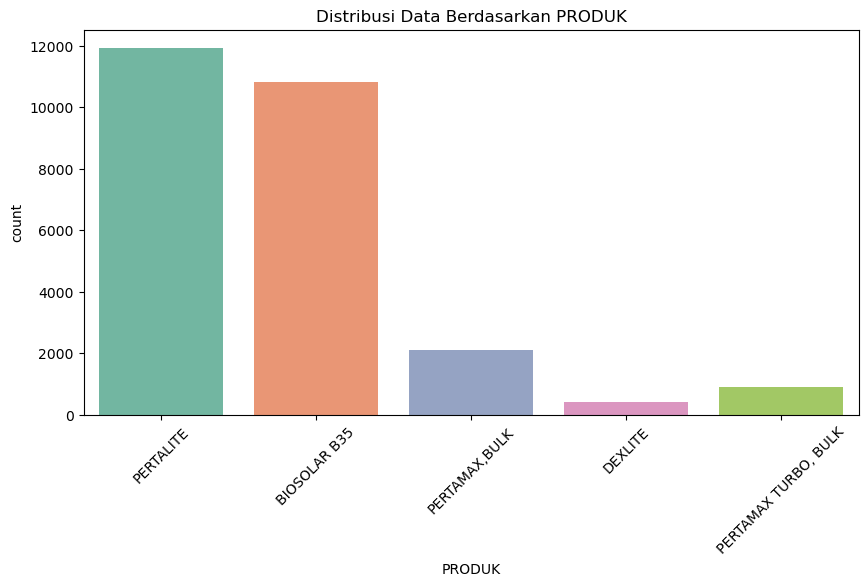

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

print("\nSTATISTIK DESKRIPSI")
display(df_mt_stop.describe())

print("\n-MISSING VALUES")
display(df_mt_stop.isnull().sum())

print("\nSTATISTIK DEKSRIPSI BERDASARKAN PRODUK")
display(df_mt_stop.groupby('PRODUK').describe())

plt.figure(figsize=(10, 5))
sns.countplot(x='PRODUK', data=df_mt_stop, palette='Set2')
plt.title('Distribusi Data Berdasarkan PRODUK')
plt.xticks(rotation=45)
plt.show()


Statistik Deskriptif untuk 'LAMA_BERHENTI_JAM':


count    26174.000000
mean         0.921795
std          0.237101
min          0.500278
25%          0.915833
50%          0.999722
75%          1.082222
max          1.500000
Name: LAMA_BERHENTI_JAM, dtype: float64

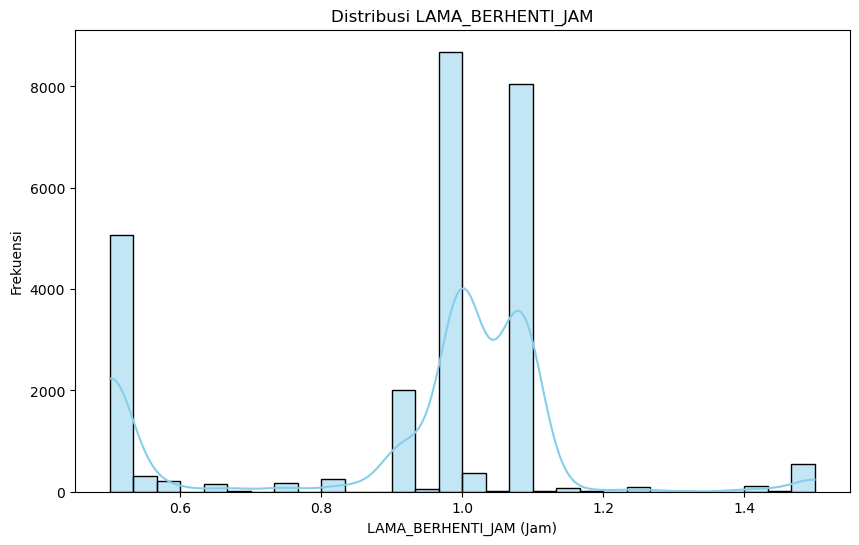

In [4]:
# Step 5: Statistik Deskriptif untuk 'LAMA_BERHENTI_JAM'
print("\nStatistik Deskriptif untuk 'LAMA_BERHENTI_JAM':")
descriptive_stats = df_mt_stop['LAMA_BERHENTI_JAM'].describe()
display(descriptive_stats)

import matplotlib.pyplot as plt
import seaborn as sns

# Membuat histogram dan KDE plot untuk 'LAMA_BERHENTI_JAM'
plt.figure(figsize=(10, 6))
sns.histplot(df_mt_stop['LAMA_BERHENTI_JAM'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi LAMA_BERHENTI_JAM')
plt.xlabel('LAMA_BERHENTI_JAM (Jam)')
plt.ylabel('Frekuensi')
plt.show()


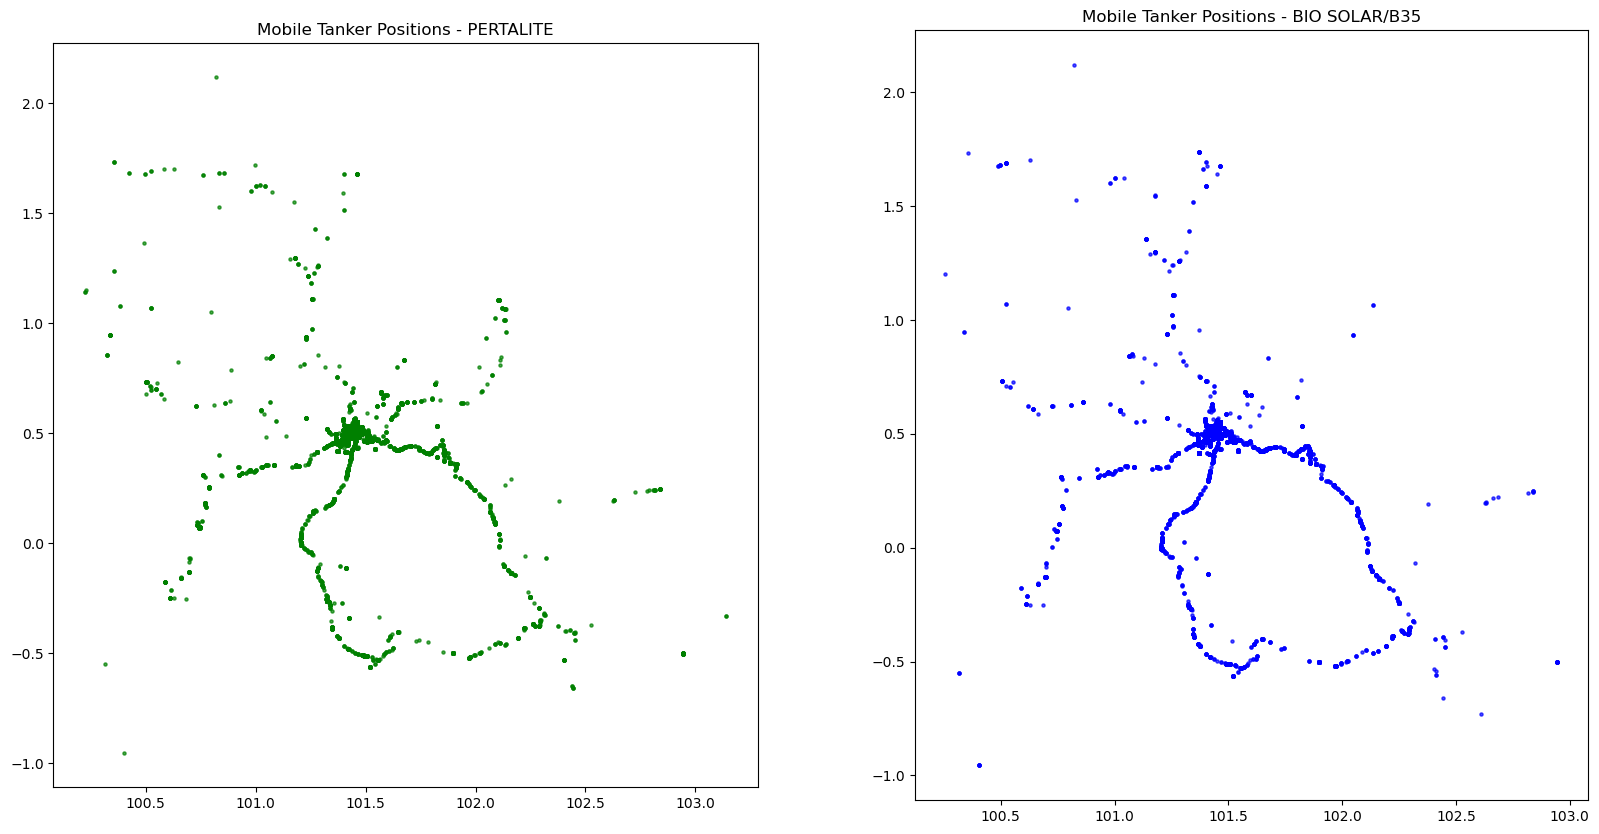

In [5]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

df_pertalite = df_mt_stop[df_mt_stop['PRODUK'] == 'PERTALITE']
gdf_mt_pertalite = gpd.GeoDataFrame(df_pertalite, 
                                    geometry=gpd.points_from_xy(df_pertalite['LONG_MT'], df_pertalite['LAT_MT']))

df_solar = df_mt_stop[df_mt_stop['PRODUK'].isin(['BIO SOLAR', 'BIOSOLAR B35'])]
gdf_mt_solar = gpd.GeoDataFrame(df_solar, 
                                geometry=gpd.points_from_xy(df_solar['LONG_MT'], df_solar['LAT_MT']))

gdf_mt_pertalite.set_crs(epsg=4326, inplace=True)
gdf_mt_solar.set_crs(epsg=4326, inplace=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

gdf_mt_pertalite.plot(ax=ax1, marker='o', color='green', markersize=5, alpha=0.7)
ax1.set_title("Mobile Tanker Positions - PERTALITE")

gdf_mt_solar.plot(ax=ax2, marker='o', color='blue', markersize=5, alpha=0.7)
ax2.set_title("Mobile Tanker Positions - BIO SOLAR/B35")

plt.show()


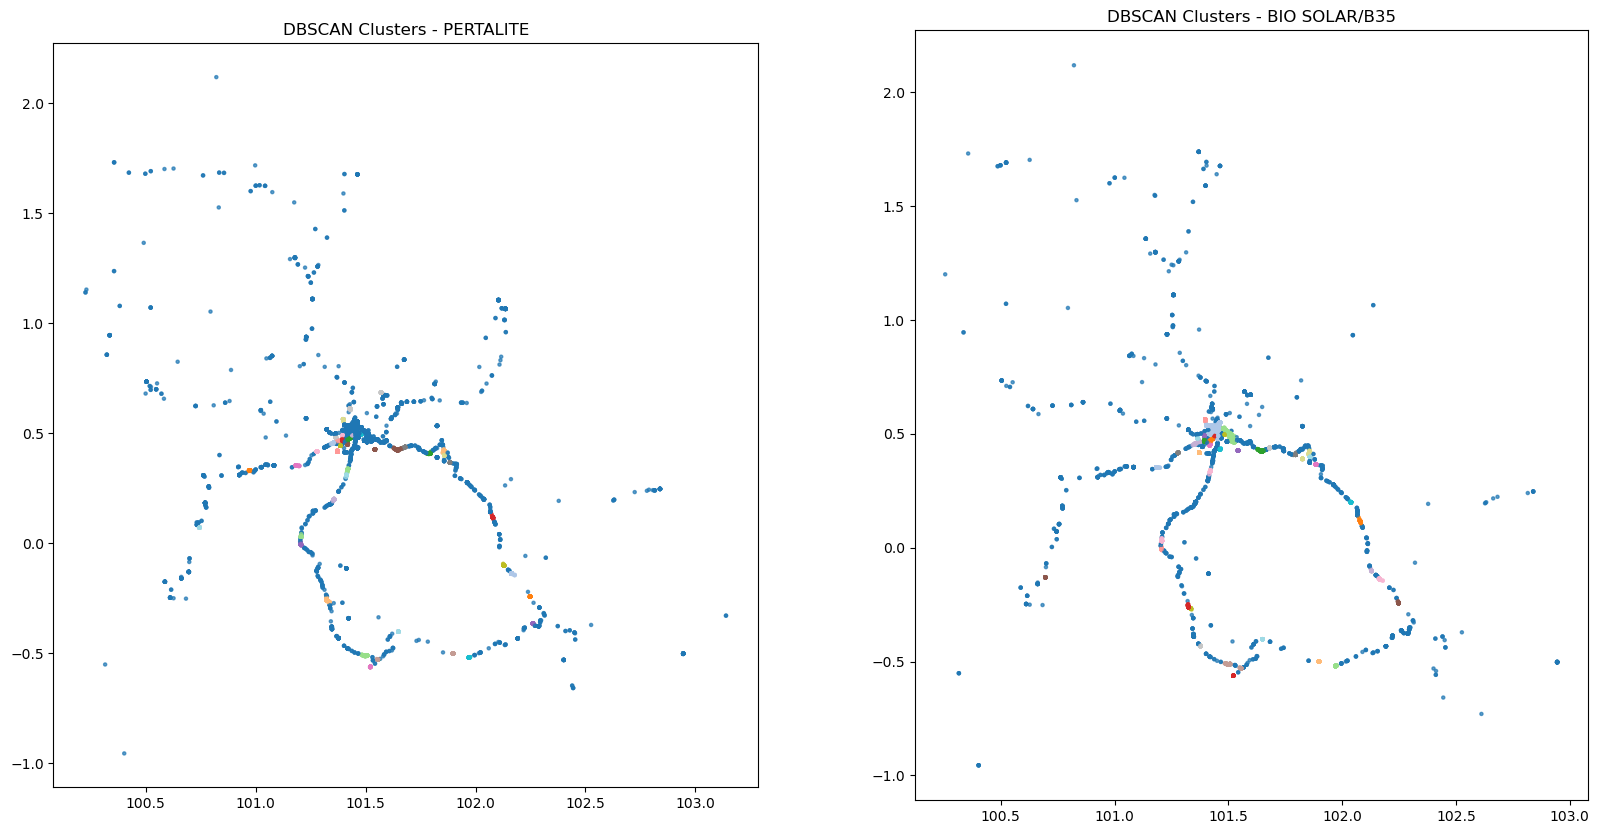

In [6]:
from sklearn.cluster import DBSCAN
import numpy as np

coords_pertalite = np.array(list(gdf_mt_pertalite.geometry.apply(lambda geom: (geom.x, geom.y))))
db_pertalite = DBSCAN(eps=0.01, min_samples=30, metric='euclidean').fit(coords_pertalite)
gdf_mt_pertalite['cluster'] = db_pertalite.labels_

coords_solar = np.array(list(gdf_mt_solar.geometry.apply(lambda geom: (geom.x, geom.y))))
db_solar = DBSCAN(eps=0.01, min_samples=30, metric='euclidean').fit(coords_solar)
gdf_mt_solar['cluster'] = db_solar.labels_

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

gdf_mt_pertalite.plot(ax=ax1, column='cluster', cmap='tab20', markersize=5, alpha=0.7)
ax1.set_title("DBSCAN Clusters - PERTALITE")

gdf_mt_solar.plot(ax=ax2, column='cluster', cmap='tab20', markersize=5, alpha=0.7)
ax2.set_title("DBSCAN Clusters - BIO SOLAR/B35")
plt.show()

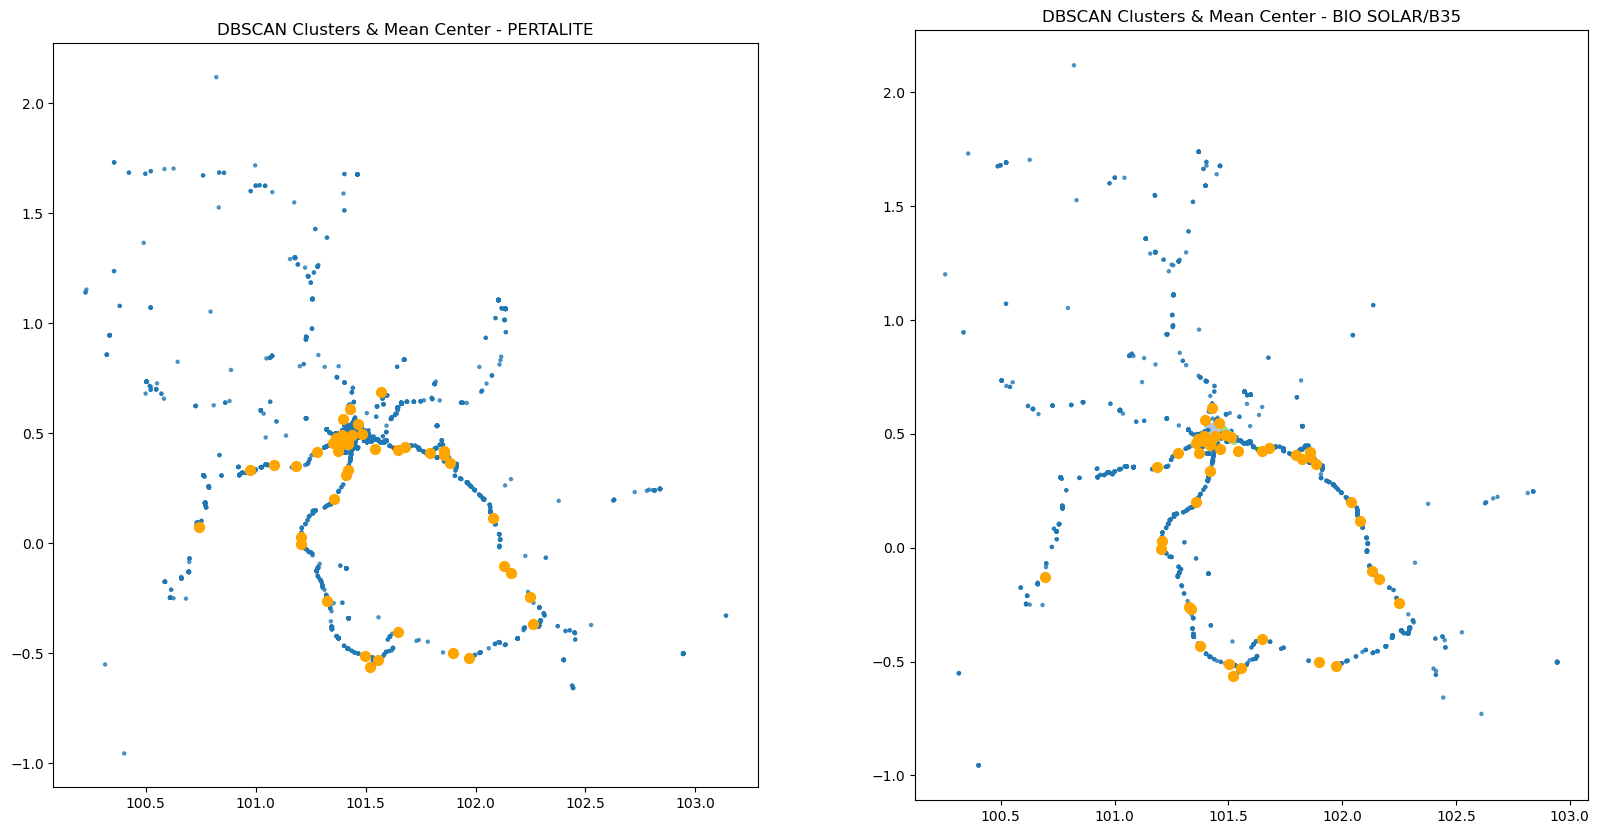

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import MultiPoint
import geopandas as gpd
from sklearn.cluster import DBSCAN

coords_pertalite = np.array(list(gdf_mt_pertalite.geometry.apply(lambda geom: (geom.x, geom.y))))
db_pertalite = DBSCAN(eps=0.01, min_samples=30, metric='euclidean').fit(coords_pertalite)
gdf_mt_pertalite['cluster'] = db_pertalite.labels_

coords_solar = np.array(list(gdf_mt_solar.geometry.apply(lambda geom: (geom.x, geom.y))))
db_solar = DBSCAN(eps=0.01, min_samples=30, metric='euclidean').fit(coords_solar)
gdf_mt_solar['cluster'] = db_solar.labels_

mean_centers_pertalite = []
mean_centers_solar = []

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

gdf_mt_pertalite.plot(ax=ax1, column='cluster', cmap='tab20', markersize=5, alpha=0.7)
clusters_pertalite = gdf_mt_pertalite['cluster'].unique()
for cluster in clusters_pertalite:
    if cluster != -1:  # Skip noise points (cluster -1)
        cluster_points = gdf_mt_pertalite[gdf_mt_pertalite['cluster'] == cluster]
        multi_point = MultiPoint(cluster_points.geometry.tolist())
        mean_center = multi_point.centroid
        
        mean_centers_pertalite.append({'cluster': cluster, 'geometry': mean_center})
        
        ax1.scatter(mean_center.x, mean_center.y, color='orange', s=50)
ax1.set_title("DBSCAN Clusters & Mean Center - PERTALITE")

gdf_mt_solar.plot(ax=ax2, column='cluster', cmap='tab20', markersize=5, alpha=0.7)
clusters_solar = gdf_mt_solar['cluster'].unique()
for cluster in clusters_solar:
    if cluster != -1:  # Skip noise points (cluster -1)
        cluster_points = gdf_mt_solar[gdf_mt_solar['cluster'] == cluster]
        multi_point = MultiPoint(cluster_points.geometry.tolist())
        mean_center = multi_point.centroid
        
        mean_centers_solar.append({'cluster': cluster, 'geometry': mean_center})
        
        ax2.scatter(mean_center.x, mean_center.y, color='orange', s=50)
ax2.set_title("DBSCAN Clusters & Mean Center - BIO SOLAR/B35")

plt.show()

gdf_mean_centers_pertalite = gpd.GeoDataFrame(mean_centers_pertalite, crs=gdf_mt_pertalite.crs)
gdf_mean_centers_pertalite.to_csv('data/mean_centers_pertalite.csv', index=False)
gdf_mean_centers_pertalite.to_file('data/mean_centers_pertalite.shp')

gdf_mean_centers_solar = gpd.GeoDataFrame(mean_centers_solar, crs=gdf_mt_solar.crs)
gdf_mean_centers_solar.to_csv('data/mean_centers_solar.csv', index=False)
gdf_mean_centers_solar.to_file('data/mean_centers_solar.shp')


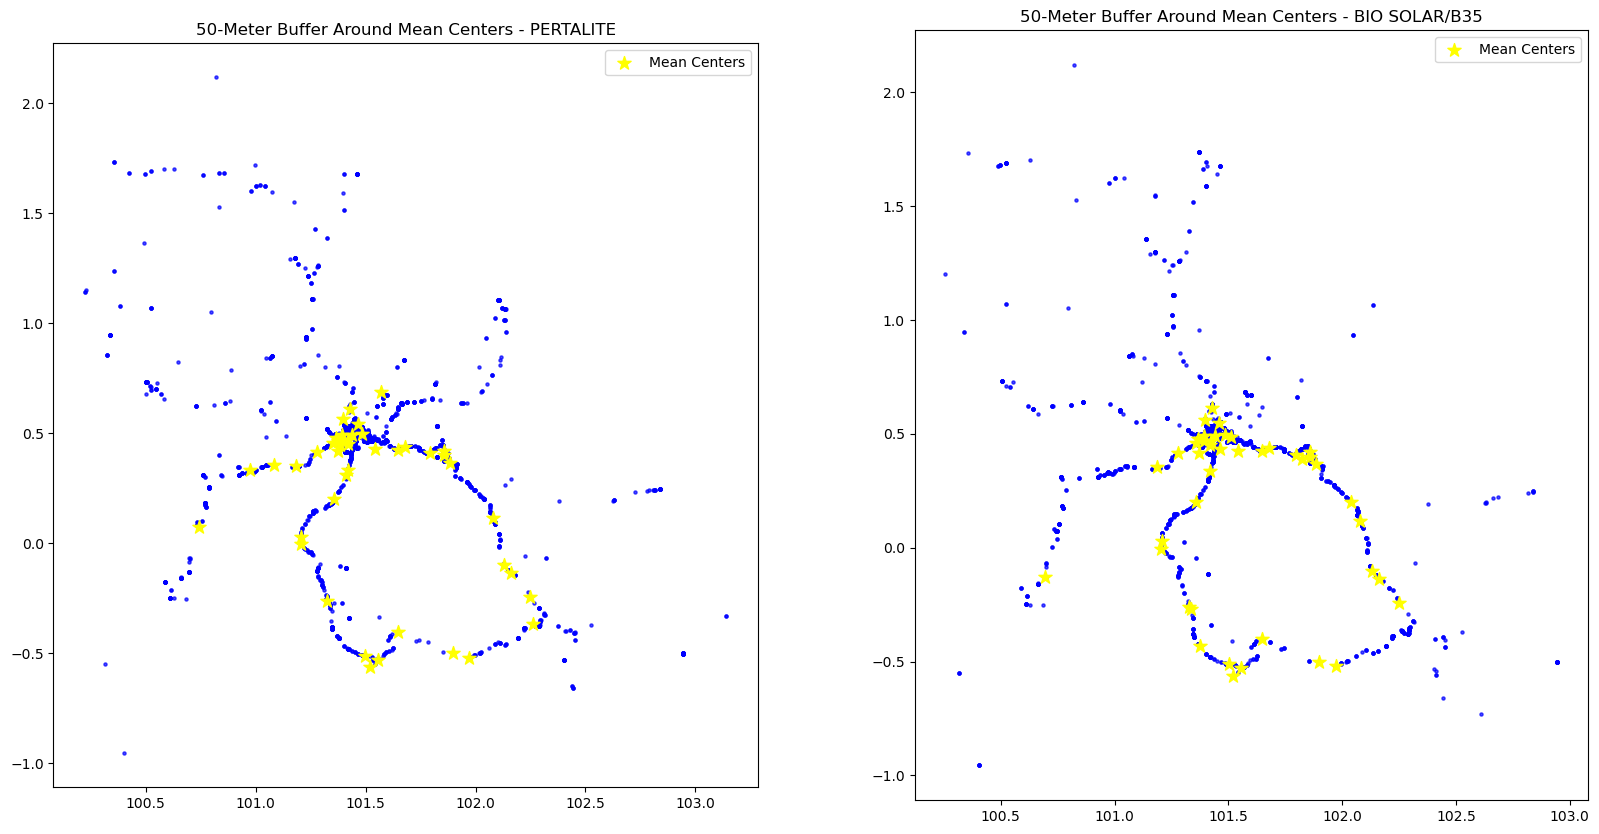

In [8]:
import geopandas as gpd6
import matplotlib.pyplot as plt
from shapely.geometry import MultiPoint

# Function to calculate mean centers, buffer, and plot
def process_mean_center_and_buffer(gdf_mt_filtered, title, ax):
    clusters = gdf_mt_filtered['cluster'].unique()

    mean_centers = []
    cluster_ids = []

    for cluster in clusters:
        if cluster != -1:  # Skip noise points (cluster -1)
            cluster_points = gdf_mt_filtered[gdf_mt_filtered['cluster'] == cluster]

            multi_point = MultiPoint(cluster_points.geometry.tolist())
            mean_center = multi_point.centroid
            mean_centers.append(mean_center)
            cluster_ids.append(cluster)

    # Create GeoDataFrame for mean centers
    gdf_mean_centers = gpd.GeoDataFrame({'cluster': cluster_ids}, geometry=mean_centers, crs="EPSG:4326")

    # Project to EPSG:3857 (meters) and create buffer
    gdf_mean_centers_projected = gdf_mean_centers.to_crs(epsg=3857)
    gdf_mean_center_buffer = gdf_mean_centers_projected.buffer(50)  # 50-meter buffer
    gdf_mean_center_buffer = gpd.GeoSeries(gdf_mean_center_buffer, crs="EPSG:3857").to_crs(epsg=4326)
    gdf_mean_center_buffer_gdf = gpd.GeoDataFrame(geometry=gdf_mean_center_buffer, crs="EPSG:4326")

    # Plot the data
    gdf_mt_filtered.plot(ax=ax, marker='o', color='blue', markersize=5, alpha=0.7)
    gdf_mean_center_buffer_gdf.plot(ax=ax, color='red', alpha=0.5)
    gdf_mean_centers.plot(ax=ax, marker='*', color='yellow', markersize=100, label="Mean Centers")

    ax.set_title(title)
    ax.legend()

# Subplots for side-by-side plotting of PERTALITE and BIOSOLAR/B35
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Process and plot PERTALITE
process_mean_center_and_buffer(gdf_mt_pertalite, "50-Meter Buffer Around Mean Centers - PERTALITE", ax1)

# Process and plot BIOSOLAR/B35
process_mean_center_and_buffer(gdf_mt_solar, "50-Meter Buffer Around Mean Centers - BIO SOLAR/B35", ax2)

# Display the plots
plt.show()

Mean centers exported to Excel: data/mean_centers_50_Meter_Buffer_Around_Mean_Centers___PERTALITE_2024-11-08_13-27-07.xlsx
Mean centers exported to Shapefile: data/mean_centers_50_Meter_Buffer_Around_Mean_Centers___PERTALITE_2024-11-08_13-27-07.shp
Mean centers exported to Excel: data/mean_centers_50_Meter_Buffer_Around_Mean_Centers___BIO_SOLAR_B35_2024-11-08_13-27-10.xlsx
Mean centers exported to Shapefile: data/mean_centers_50_Meter_Buffer_Around_Mean_Centers___BIO_SOLAR_B35_2024-11-08_13-27-10.shp


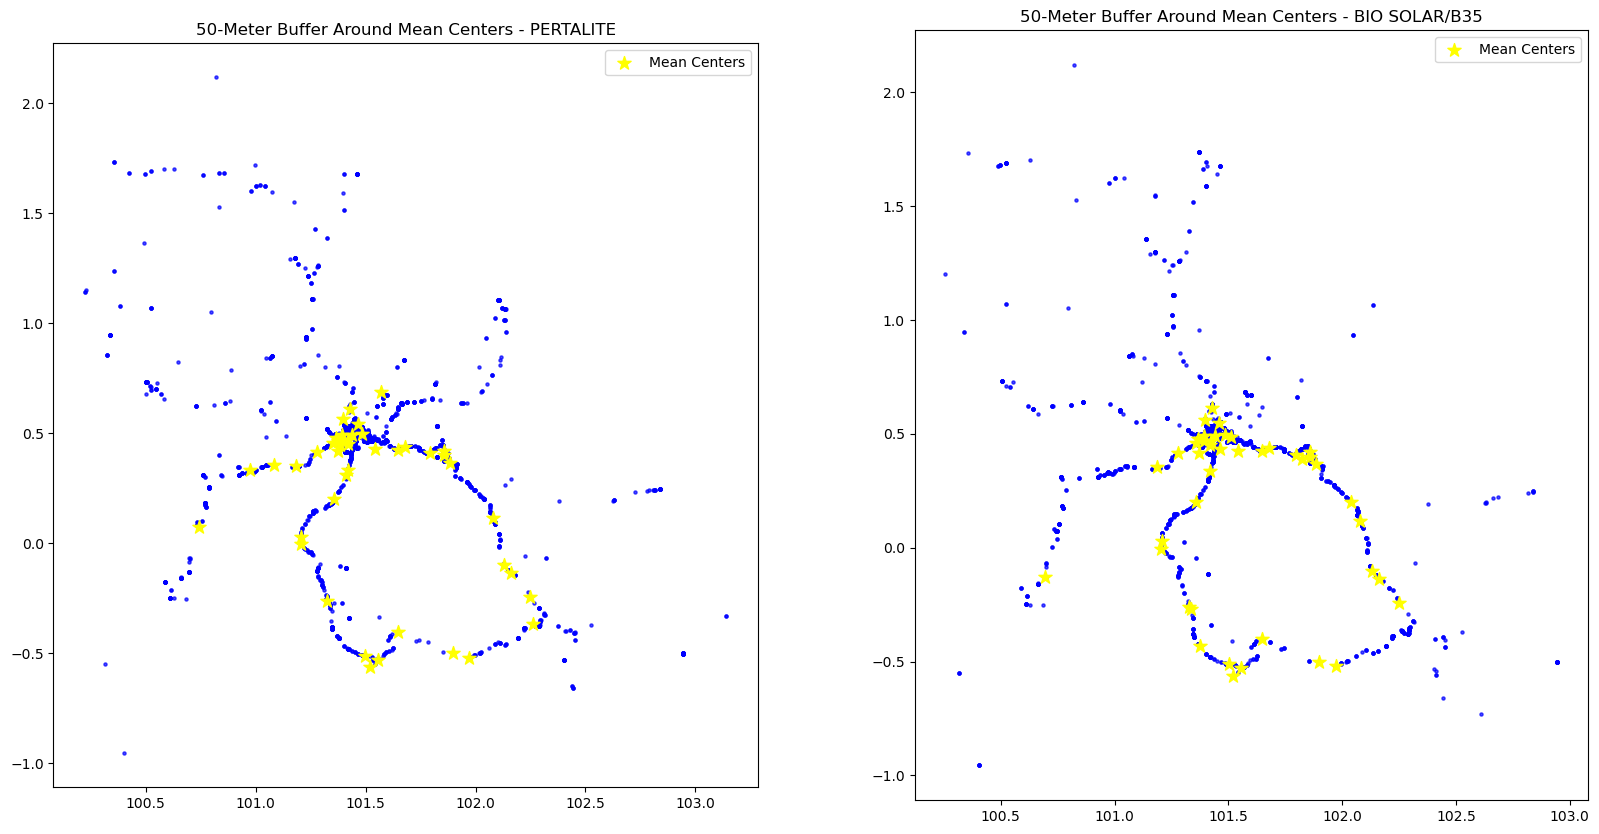

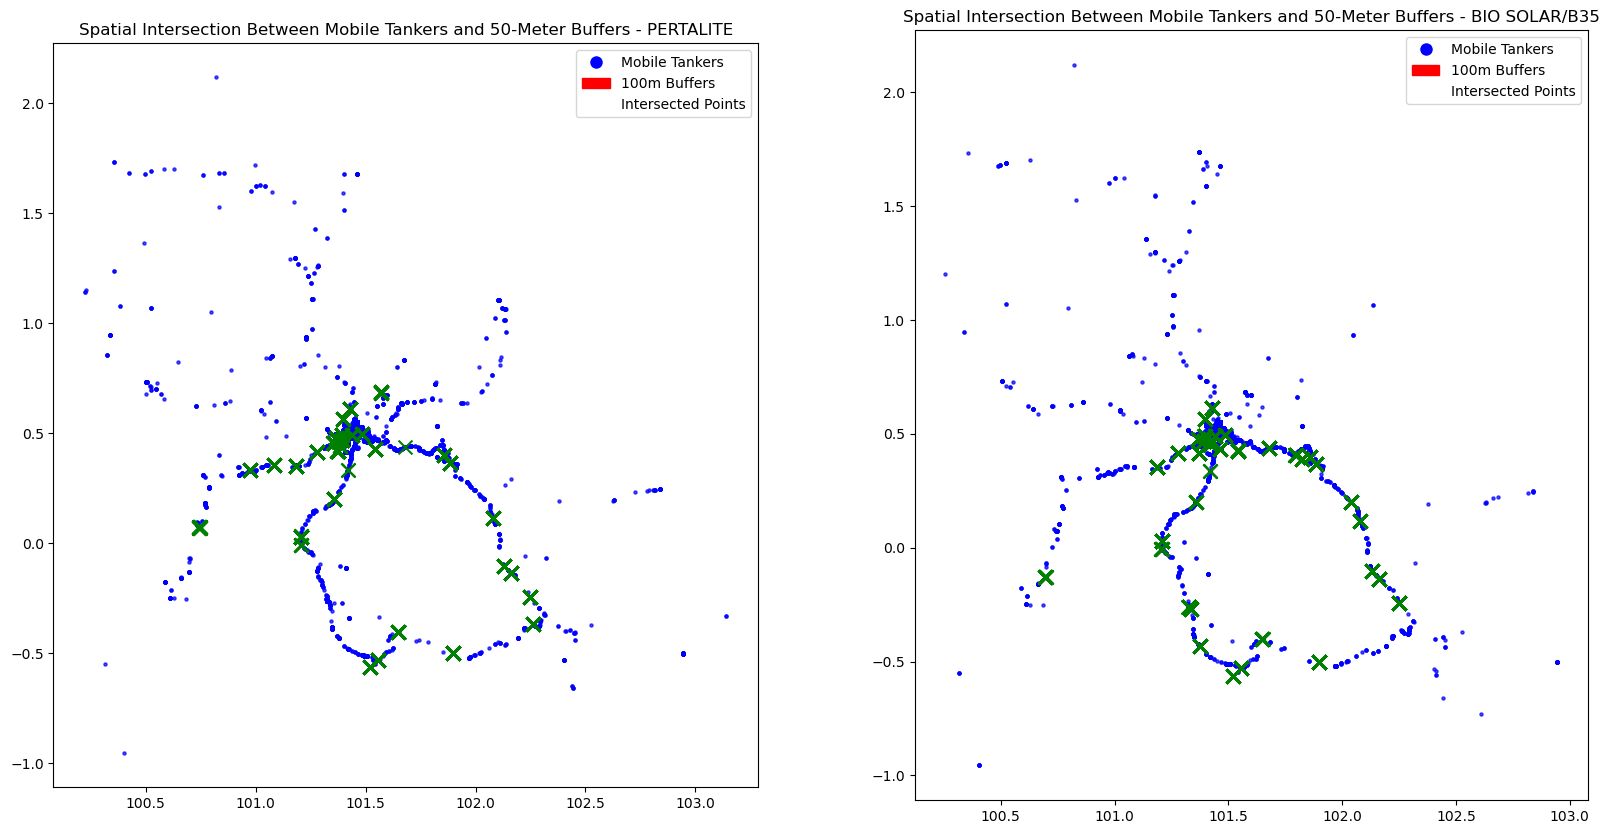

In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from openpyxl.styles import PatternFill, Border, Side
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.utils import get_column_letter
from openpyxl.styles import Font
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from datetime import datetime, timedelta

def process_mean_center_and_buffer(gdf_mt_filtered, title, ax):
    clusters = gdf_mt_filtered['cluster'].unique()

    mean_centers = []
    cluster_ids = []

    for cluster in clusters:
        if cluster != -1:  # Skip noise points (cluster -1)
            cluster_points = gdf_mt_filtered[gdf_mt_filtered['cluster'] == cluster]

            multi_point = MultiPoint(cluster_points.geometry.tolist())
            mean_center = multi_point.centroid
            mean_centers.append(mean_center)
            cluster_ids.append(cluster)

    gdf_mean_centers = gpd.GeoDataFrame({'cluster': cluster_ids}, geometry=mean_centers, crs="EPSG:4326")
    gdf_mean_centers_projected = gdf_mean_centers.to_crs(epsg=3857)
    gdf_mean_center_buffer = gdf_mean_centers_projected.buffer(100) 
    gdf_mean_center_buffer = gpd.GeoSeries(gdf_mean_center_buffer, crs="EPSG:3857").to_crs(epsg=4326)
    gdf_mean_center_buffer_gdf = gpd.GeoDataFrame(geometry=gdf_mean_center_buffer, crs="EPSG:4326")
    gdf_mt_filtered.plot(ax=ax, marker='o', color='blue', markersize=5, alpha=0.7)
    gdf_mean_center_buffer_gdf.plot(ax=ax, color='red', alpha=0.5)
    gdf_mean_centers.plot(ax=ax, marker='*', color='yellow', markersize=100, label="Mean Centers")

    ax.set_title(title)
    ax.legend()

    now = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    sanitized_title = title.replace(' ', '_').replace('/', '_').replace('-', '_')
    mean_center_excel_path = f"data/mean_centers_{sanitized_title}_{now}.xlsx"
    gdf_mean_centers.to_excel(mean_center_excel_path, index=False)
    print(f"Mean centers exported to Excel: {mean_center_excel_path}")

    mean_center_shp_path = f"data/mean_centers_{sanitized_title}_{now}.shp"
    gdf_mean_centers.to_file(mean_center_shp_path)
    print(f"Mean centers exported to Shapefile: {mean_center_shp_path}")

    return gdf_mean_centers, gdf_mean_center_buffer_gdf 


def process_intersection(gdf_mt_filtered, gdf_mean_center_buffer_gdf, gdf_mean_centers, ax, file_name):
    gdf_intersect = gpd.sjoin(gdf_mt_filtered, gdf_mean_center_buffer_gdf, how="inner", predicate="intersects")
    
    gdf_intersect = gdf_intersect.merge(gdf_mean_centers[['cluster', 'geometry']], on='cluster', how='left', suffixes=('', '_mean_center'))

    gdf_mt_filtered.plot(ax=ax, marker='o', color='blue', markersize=5, alpha=0.7)
    gdf_mean_center_buffer_gdf.plot(ax=ax, color='red', alpha=0.5)
    gdf_intersect.plot(ax=ax, marker='x', color='green', markersize=100)

    gdf_intersect['LAT_CLUSTER'] = gdf_intersect['geometry_mean_center'].apply(lambda geom: geom.y)
    gdf_intersect['LONG_CLUSTER'] = gdf_intersect['geometry_mean_center'].apply(lambda geom: geom.x)
    gdf_intersect['CLUSTER_ID'] = gdf_intersect['cluster']
    gdf_intersect['BUFFER_DISTANCE'] = 100

    all_columns = list(gdf_intersect.columns) 
    additional_columns = ['LAT_CLUSTER', 'LONG_CLUSTER', 'CLUSTER_ID', 'BUFFER_DISTANCE']
    export_columns = all_columns + additional_columns 
    export_columns = list(dict.fromkeys(export_columns))

    gdf_intersect = gdf_intersect[export_columns]

    if 'geometry' in gdf_intersect.columns:
        df_intersect = pd.DataFrame(gdf_intersect.drop(columns='geometry'))
    else:
        df_intersect = pd.DataFrame(gdf_intersect)

    now = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    with pd.ExcelWriter(f"data/{file_name}_{now}.xlsx", engine='openpyxl') as writer:
        df_intersect.to_excel(writer, sheet_name=f"mt_stop_{now}", index=False)
        workbook = writer.book
        worksheet = writer.sheets[f"mt_stop_{now}"]

        for col in worksheet.columns:
            max_length = 0
            column = col[0].column_letter
            for cell in col:
                try:
                    if cell.value is not None and len(str(cell.value)) > max_length:
                        max_length = len(str(cell.value))
                except Exception as e:
                    print(f"Error processing cell {cell}: {e}")
            adjusted_width = (max_length + 2)
            worksheet.column_dimensions[column].width = adjusted_width

        thin_border = Border(left=Side(style='thin'), right=Side(style='thin'),
                             top=Side(style='thin'), bottom=Side(style='thin'))
        for row in worksheet.iter_rows():
            for cell in row:
                cell.border = thin_border
                cell.fill = PatternFill(start_color='FFFFFF', end_color='FFFFFF', fill_type='solid')

        worksheet.auto_filter.ref = worksheet.dimensions

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
gdf_mean_centers_pertalite, gdf_mean_center_buffer_gdf_pertalite = process_mean_center_and_buffer(gdf_mt_pertalite, "50-Meter Buffer Around Mean Centers - PERTALITE", ax1)
gdf_mean_centers_solar, gdf_mean_center_buffer_gdf_solar = process_mean_center_and_buffer(gdf_mt_solar, "50-Meter Buffer Around Mean Centers - BIO SOLAR/B35", ax2)

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(20, 10))
process_intersection(gdf_mt_pertalite, gdf_mean_center_buffer_gdf_pertalite, gdf_mean_centers_pertalite, ax3, "pertalite")
process_intersection(gdf_mt_solar, gdf_mean_center_buffer_gdf_solar, gdf_mean_centers_solar, ax4, "biosolar")
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Mobile Tankers'),
    Patch(facecolor='red', edgecolor='red', label='100m Buffers'),
    Line2D([0], [0], marker='x', color='w', markerfacecolor='green', markersize=10, label='Intersected Points')
]
ax3.legend(handles=legend_elements)
ax3.set_title("Spatial Intersection Between Mobile Tankers and 50-Meter Buffers - PERTALITE")
ax4.legend(handles=legend_elements)
ax4.set_title("Spatial Intersection Between Mobile Tankers and 50-Meter Buffers - BIO SOLAR/B35")

plt.show()